# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('api.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2 
my_eth = 5.3 

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
print(eth_price)
# Compute current value of my crypto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

2227.32
The current value of your 1.2 BTC is $48108.00
The current value of your 5.3 ETH is $11804.80


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
current_date = pd.Timestamp("2024-01-24", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_ticker = api.get_bars(tickers,timeframe, start=current_date).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])
# Preview DataFrame
# YOUR CODE HERE!
df_ticker.head()

AGG                                            \
                           close   high   low trade_count   open    volume   
timestamp                                                                    
2024-01-24 05:00:00+00:00  97.74  98.33  97.7       42228  98.29  11278509   

                                        SPY                                \
                               vwap   close    high       low trade_count   
timestamp                                                                   
2024-01-24 05:00:00+00:00  97.89025  485.39  488.77  484.8819      621289   

                                                         
                             open    volume        vwap  
timestamp                                                
2024-01-24 05:00:00+00:00  487.81  81764592  486.643732

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_ticker["AGG"]["close"].iloc[-1]
spy_close_price = df_ticker["SPY"]["close"].iloc[-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.74
Current SPY closing price: $485.39


In [11]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $24269.50
The current value of your 200 AGG shares is $19548.00


### Savings Health Analysis

In [12]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame({'amount': [crypto_value, shares_value]}, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,59912.796
shares,43817.500


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

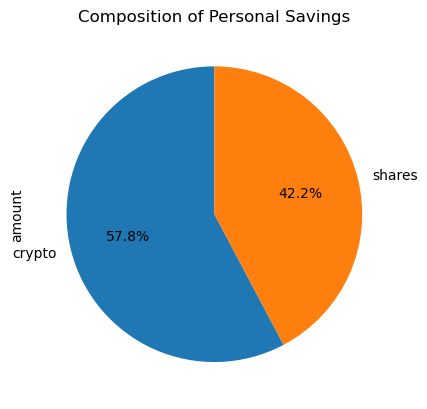

In [13]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount', autopct='%1.1f%%', startangle=90, legend=False, title='Composition of Personal Savings')


In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto_value + shares_value
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal for the emergency fund.")
else:
    dollars_away = emergency_fund - total_savings
    print(f"You are ${dollars_away:0.2f} away from reaching your emergency fund goal.")


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [31]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
start_date = pd.Timestamp('2019-01-24', tz='America/New_York').isoformat()  
end_date = pd.Timestamp('2024-01-24', tz='America/New_York').isoformat()
df_stock_data = api.get_bars(tickers, timeframe, start=start_date, end=end_date).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])
# Display sample data
df_stock_data.head()

AGG                                        \
                            close     high      low trade_count    open   
timestamp                                                                 
2019-01-24 05:00:00+00:00  106.73  106.840  106.670       14633  106.72   
2019-01-25 05:00:00+00:00  106.68  106.700  106.560       15541  106.64   
2019-01-28 05:00:00+00:00  106.62  106.745  106.580       17764  106.62   
2019-01-29 05:00:00+00:00  106.90  106.925  106.685       17524  106.73   
2019-01-30 05:00:00+00:00  107.14  107.150  106.790       18798  106.79   

                                                   SPY                    \
                            volume        vwap   close    high       low   
timestamp                                                                  
2019-01-24 05:00:00+00:00  7961374  106.741608  263.60  264.20  262.0800   
2019-01-25 05:00:00+00:00  3633492  106.640407  265.78  266.70  263.6595   
2019-01-28 05:00:00+00:00  8294535  106.634323  263.78  263.83  261.7900   
2019-01-29 05:00:00+00:00  6737073  106.839335  263.52  264.55  262.4800   
2019-01-30 05:00:00+00:00  7508665  107.030162  267.44  268.52  264.2500   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2019-01-24 05:00:00+00:00      315574  263.21  61342224  263.264945  
2019-01-25 05:00:00+00:00      409292  265.61  98218282  265.862184  
2019-01-28 05:00:00+00:00      408382  263.39  87421778  263.369609  
2019-01-29 05:00:00+00:00      287012  263.92  67650406  263.505274  
2019-01-30 05:00:00+00:00      469964  265.10  93982824  266.596859

In [33]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [34]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear.portfolio_data.head()

AGG                                        \
                            close     high      low trade_count    open   
timestamp                                                                 
2019-01-24 05:00:00+00:00  106.73  106.840  106.670       14633  106.72   
2019-01-25 05:00:00+00:00  106.68  106.700  106.560       15541  106.64   
2019-01-28 05:00:00+00:00  106.62  106.745  106.580       17764  106.62   
2019-01-29 05:00:00+00:00  106.90  106.925  106.685       17524  106.73   
2019-01-30 05:00:00+00:00  107.14  107.150  106.790       18798  106.79   

                                                                SPY          \
                            volume        vwap daily_return   close    high   
timestamp                                                                     
2019-01-24 05:00:00+00:00  7961374  106.741608          NaN  263.60  264.20   
2019-01-25 05:00:00+00:00  3633492  106.640407    -0.000468  265.78  266.70   
2019-01-28 05:00:00+00:00  8294535  106.634323    -0.000562  263.78  263.83   
2019-01-29 05:00:00+00:00  6737073  106.839335     0.002626  263.52  264.55   
2019-01-30 05:00:00+00:00  7508665  107.030162     0.002245  267.44  268.52   

                                                                               \
                                low trade_count    open    volume        vwap   
timestamp                                                                       
2019-01-24 05:00:00+00:00  262.0800      315574  263.21  61342224  263.264945   
2019-01-25 05:00:00+00:00  263.6595      409292  265.61  98218282  265.862184   
2019-01-28 05:00:00+00:00  261.7900      408382  263.39  87421778  263.369609   
2019-01-29 05:00:00+00:00  262.4800      287012  263.92  67650406  263.505274   
2019-01-30 05:00:00+00:00  264.2500      469964  265.10  93982824  266.596859   

                                        
                          daily_return  
timestamp                               
2019-01-24 05:00:00+00:00          NaN  
2019-01-25 05:00:00+00:00     0.008270  
2019-01-28 05:00:00+00:00    -0.007525  
2019-01-29 05:00:00+00:00    -0.000986  
2019-01-30 05:00:00+00:00     0.014876

In [35]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991073,0.999923,1.015072,1.012153,0.991243,0.997641,0.995406,1.001148,0.989235,0.983862,...,1.008786,0.995827,1.002217,1.007352,1.004148,1.004218,1.000966,0.995536,1.001155,1.011360
2,1.004516,0.998574,1.015782,1.007777,0.983999,1.006008,0.993896,0.997247,0.990075,0.987941,...,0.996588,1.001372,1.003420,1.009033,1.009048,0.994791,1.009207,0.996270,1.007923,1.015070
3,0.995114,0.992190,1.008865,1.013635,0.988451,1.006802,0.988428,1.001053,0.998158,0.999200,...,0.993792,1.001520,0.997382,1.004173,1.023173,0.994598,1.006129,0.998259,0.999714,1.012768
4,0.981389,0.995550,1.012624,1.018341,0.986603,1.023426,0.986475,0.992636,0.996698,1.000686,...,1.004193,1.002294,1.014190,0.984853,1.019737,0.984661,1.003639,0.974802,1.000857,1.009871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,35.044741,13.603695,3.174062,8.514382,10.976017,5.287770,23.284776,6.971325,4.830834,6.692301,...,12.747108,9.796624,5.587896,11.520988,4.641529,4.949711,5.498753,52.463429,26.557917,14.831464
7557,35.259604,13.682139,3.193625,8.415346,11.104327,5.342499,23.035512,6.996382,4.865485,6.719420,...,12.495790,9.841720,5.587667,11.573952,4.647885,4.861579,5.515687,52.134046,26.499113,14.613178
7558,35.615333,13.802028,3.173066,8.475283,11.302721,5.328185,23.173801,7.080941,4.848644,6.656820,...,12.452037,9.834829,5.503085,11.614181,4.648263,4.866859,5.498381,51.896445,26.613395,14.753318
7559,35.485868,13.850485,3.197360,8.415093,11.219141,5.344907,23.276542,7.075497,4.863104,6.648238,...,12.463405,9.933685,5.493694,11.724164,4.665541,4.878192,5.450680,51.601325,26.227395,14.499932


<Axes: title={'center': '1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

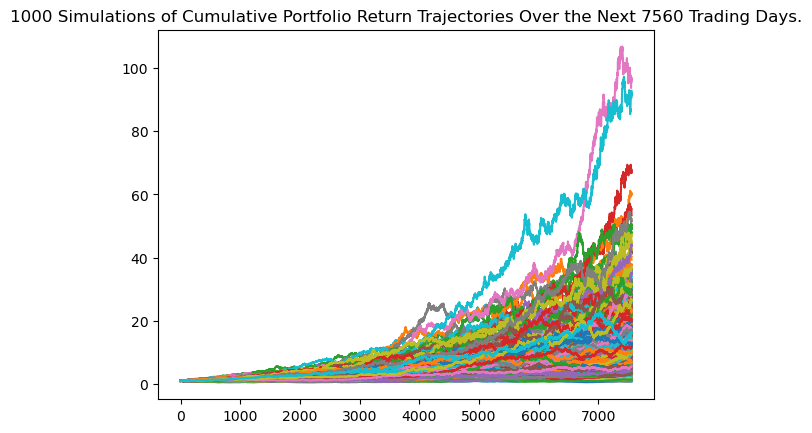

In [36]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_thirtyyear.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

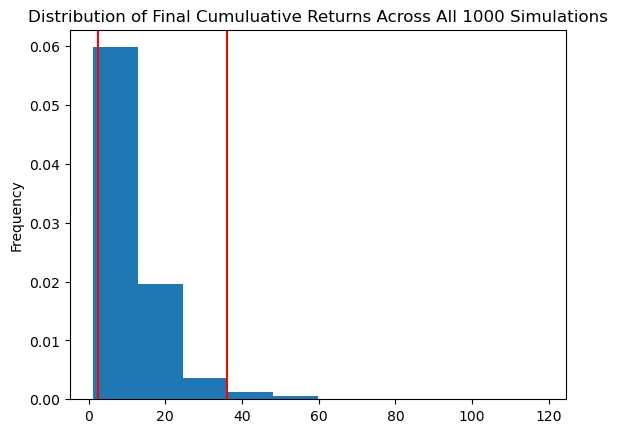

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           1000.000000
mean              11.440945
std                9.297060
min                1.121069
25%                5.716231
50%                8.924553
75%               14.062163
max              118.659192
95% CI Lower       2.411090
95% CI Upper      35.980509
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $48221.8 and $719610.18


/var/folders/sg/ppzpg3hd4rqdrj7bn5vn4j5c0000gp/T/ipykernel_50742/3446104326.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(tbl[8] * initial_investment, 2)
/var/folders/sg/ppzpg3hd4rqdrj7bn5vn4j5c0000gp/T/ipykernel_50742/3446104326.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(tbl[9] * initial_investment, 2)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")